# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os
import datetime

# Import API key
#from api_keys import api_key
#from api_keys2 import api_key  #cus I know I'm going to screw this part up
from api_keys3 import api_key  #cus I know I'm going to screw this part up more then once.

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


#Useful links:
#- API documentation https://openweathermap.org/api


## Generate Cities List

In [54]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [55]:
#print cities to output_data folder
# Specify the file to write to
output_data_file = os.path.join("output_data","cities.csv")

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_data_file, 'w', newline='') as csvfile:
    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')
    # Write the first row (column headers)
    for city in cities:
        csvwriter.writerow([city])

#testing
#for city in cities:
#    print(city)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
#Creating base URL and empty dataframe
url = f'https://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q='
data_df = pd.DataFrame({'City':[],
                        'Cloudiness':[],
                        'Country':[],
                        'Date':[],
                        'Humidity':[],
                        'Lat':[],
                        'Lng':[],
                        'Max_temp':[],
                        'Wind_speed':[]
                       })

#testing
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 9 columns):
City          0 non-null float64
Cloudiness    0 non-null float64
Country       0 non-null float64
Date          0 non-null float64
Humidity      0 non-null float64
Lat           0 non-null float64
Lng           0 non-null float64
Max_temp      0 non-null float64
Wind_speed    0 non-null float64
dtypes: float64(9)
memory usage: 76.0 bytes


In [57]:
#API request for every city and populating dataframe -loop
i = 0
for city in cities:    
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response['cod'] == 200):
        i = i+1
        print(f'Procesing Record {i} | {city}')
        print(response_req.url)

        data_df.loc[i,'City'] = city
        data_df.loc[i,'Country'] = response['sys']['country']
        data_df.loc[i,'Date'] = response['dt'] 
        data_df.loc[i,'Lat'] = response['coord']['lat']
        data_df.loc[i,'Lng'] = response['coord']['lon']
        data_df.loc[i,'Cloudiness'] = response['clouds']['all']
        data_df.loc[i,'Humidity'] = response['main']['humidity']
        data_df.loc[i,'Max_temp'] = response['main']['temp_max']
        data_df.loc[i,'Wind_speed'] = response['wind']['speed']
    else:
        print('City not found? Skip it.')
            
print("~*~*~*~*~*~*~*~*~*~*~*~*~*~*")
print("Data Retrieval Complete")      
print("~*~*~*~*~*~*~*~*~*~*~*~*~*~*")

Procesing Record 1 | tuktoyaktuk
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=tuktoyaktuk
Procesing Record 2 | busselton
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=busselton
Procesing Record 3 | lewistown
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=lewistown
Procesing Record 4 | hermanus
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=hermanus
Procesing Record 5 | lebu
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=lebu
Procesing Record 6 | baker city
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=baker%20city
Procesing Record 7 | sorong
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=so

Procesing Record 58 | port shepstone
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=port%20shepstone
Procesing Record 59 | atuona
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=atuona
Procesing Record 60 | jamestown
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=jamestown
Procesing Record 61 | norman wells
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=norman%20wells
Procesing Record 62 | qaanaaq
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=qaanaaq
Procesing Record 63 | kita
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=kita
Procesing Record 64 | kruisfontein
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&un

Procesing Record 113 | cukai
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=cukai
Procesing Record 114 | biak
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=biak
Procesing Record 115 | samarai
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=samarai
Procesing Record 116 | ananas
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=ananas
Procesing Record 117 | port elizabeth
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=port%20elizabeth
Procesing Record 118 | baykit
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=baykit
City not found? Skip it.
Procesing Record 119 | saint-philippe
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c30

Procesing Record 168 | gap
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=gap
Procesing Record 169 | baft
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=baft
Procesing Record 170 | ostrovnoy
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=ostrovnoy
Procesing Record 171 | gat
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=gat
Procesing Record 172 | zaysan
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=zaysan
Procesing Record 173 | sitka
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=sitka
City not found? Skip it.
Procesing Record 174 | port-de-bouc
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=p

Procesing Record 223 | inuvik
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=inuvik
Procesing Record 224 | jaicos
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=jaicos
Procesing Record 225 | agadez
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=agadez
City not found? Skip it.
Procesing Record 226 | los llanos de aridane
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=los%20llanos%20de%20aridane
Procesing Record 227 | quelimane
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=quelimane
Procesing Record 228 | pacific grove
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=pacific%20grove
Procesing Record 229 | porto novo
https://api.openweathermap.org/data/2

Procesing Record 279 | dudinka
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=dudinka
Procesing Record 280 | rocha
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=rocha
Procesing Record 281 | valer
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=valer
Procesing Record 282 | thunder bay
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=thunder%20bay
Procesing Record 283 | sovetskaya gavan
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=sovetskaya%20gavan
Procesing Record 284 | dunedin
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=dunedin
Procesing Record 285 | kamenka
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&un

Procesing Record 334 | nago
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=nago
Procesing Record 335 | dwarka
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=dwarka
Procesing Record 336 | hami
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=hami
Procesing Record 337 | hammerfest
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=hammerfest
Procesing Record 338 | atar
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=atar
Procesing Record 339 | chumikan
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=chumikan
Procesing Record 340 | talaya
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=talaya
City not foun

Procesing Record 389 | llangefni
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=llangefni
Procesing Record 390 | rio grande
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=rio%20grande
Procesing Record 391 | okhotsk
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=okhotsk
City not found? Skip it.
Procesing Record 392 | inhambane
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=inhambane
Procesing Record 393 | malanje
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=malanje
Procesing Record 394 | yulara
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=yulara
Procesing Record 395 | hudson bay
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc3

City not found? Skip it.
Procesing Record 444 | nyurba
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=nyurba
City not found? Skip it.
Procesing Record 445 | ballarat
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=ballarat
Procesing Record 446 | morlaix
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=morlaix
Procesing Record 447 | aksay
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=aksay
Procesing Record 448 | trelew
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=trelew
Procesing Record 449 | oume
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=oume
Procesing Record 450 | half moon bay
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5f

Procesing Record 500 | bambanglipuro
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=bambanglipuro
Procesing Record 501 | lasa
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=lasa
Procesing Record 502 | pontes e lacerda
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=pontes%20e%20lacerda
Procesing Record 503 | mount isa
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=mount%20isa
Procesing Record 504 | povenets
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=povenets
Procesing Record 505 | kovernino
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=kovernino
Procesing Record 506 | shawnee
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
#CVS convertion
# Specify the file to write to
output_data_file = os.path.join("output_data","weatherHW_data.csv")

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_data_file, 'a',) as f:
    data_df.to_csv(f, header=f.tell()==0)

#https://stackoverflow.com/questions/17530542/how-to-add-pandas-data-to-an-existing-csv-file
#https://datatofish.com/export-dataframe-to-csv/
    
data_df.to_csv('weatherHW_data.csv') #oh my god I love this! so short so simple
data_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
1,tuktoyaktuk,5.0,CA,1.547356e+09,66.0,69.44,-133.03,-32.81,4.70
2,busselton,0.0,AU,1.547358e+09,80.0,-33.64,115.35,74.90,17.00
3,lewistown,90.0,US,1.547356e+09,96.0,40.39,-90.15,29.66,16.11
4,hermanus,12.0,ZA,1.547358e+09,74.0,-34.42,19.24,63.20,9.95
5,lebu,0.0,ET,1.547356e+09,34.0,8.96,38.73,51.80,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

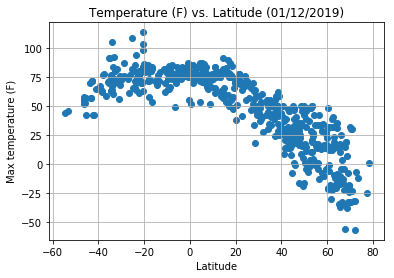

In [59]:


date = time.strftime("%m/%d/%Y")
#date = datetime.now()     #uses the import datetime dependencies

plt.figure()
plt.scatter(data_df['Lat'],data_df['Max_temp'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title(f"Temperature (F) vs. Latitude ({date})")
plt.savefig('LatvsTemp.png')

#https://www.devdungeon.com/content/working-binary-data-python
#with open(output_data_file, "w", newline="") as img:
#    writer = csv.writer(datafile)
#def open_file_cm(output_data_file, mode="r", encoding=None):
#--> 626     fh, opened = to_filehandle(path_or_file, mode, True, encoding)
#    627     if opened:
#    628         with fh:
        
#https://stackoverflow.com/questions/41586429/opencv-saving-images-to-a-particular-folder-of-choice
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html
#https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig
#https://stackoverflow.com/questions/13642528/how-to-export-figures-to-files-from-ipython-notebook
#http://www.jesshamrick.com/2012/09/03/saving-figures-from-pyplot/
#https://www.geeksforgeeks.org/working-images-python/

#### Latitude vs. Humidity Plot

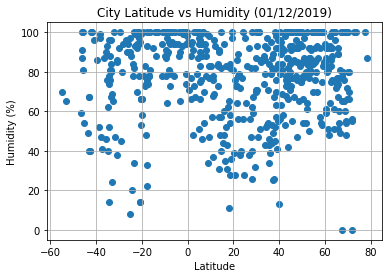

In [60]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Humidity'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity ({date})")
plt.savefig('LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

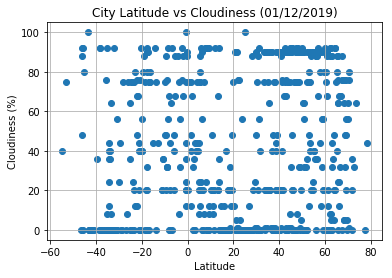

In [61]:

plt.figure()
plt.scatter(data_df['Lat'],data_df['Cloudiness'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.savefig('LatvsCloudiness.png')

#### Latitude vs. Wind Speed Plot

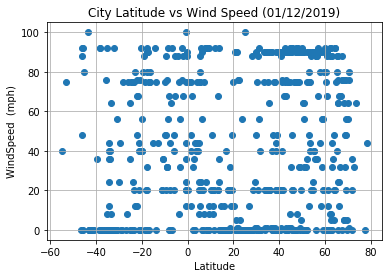

In [62]:

plt.figure()
plt.scatter(data_df['Lat'],data_df['Cloudiness'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('WindSpeed  (mph)')
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.savefig('LatvsWindSpeed.png')